In [51]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults
from sklearn.model_selection import train_test_split
from pylab import rcParams


In [53]:
data=pd.read_csv("CH4_CO.csv")

In [54]:
data

,time,CH4,CO
0,2015-01-01 0:00,2.1,0.79
1,2015-01-01 1:00,2.1,0.8
2,2015-01-01 2:00,2.1,0.71
3,2015-01-01 3:00,2,0.66
4,2015-01-01 4:00,2,0.53
...,...,...,...
8755,2015-12-31 19:00,2,1.04
8756,2015-12-31 20:00,2,0.87
8757,2015-12-31 21:00,2,0.79
8758,2015-12-31 22:00,2,0.79


In [55]:
temp=data['time'].values
temp2 = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M") for x in temp]
data['time'] = temp2

del temp,temp2

In [56]:
data['time'].values

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000', ...,
       '2015-12-31T21:00:00.000000000', '2015-12-31T22:00:00.000000000',
       '2015-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [57]:
data

,time,CH4,CO
0,2015-01-01 00:00:00,2.1,0.79
1,2015-01-01 01:00:00,2.1,0.8
2,2015-01-01 02:00:00,2.1,0.71
3,2015-01-01 03:00:00,2,0.66
4,2015-01-01 04:00:00,2,0.53
...,...,...,...
8755,2015-12-31 19:00:00,2,1.04
8756,2015-12-31 20:00:00,2,0.87
8757,2015-12-31 21:00:00,2,0.79
8758,2015-12-31 22:00:00,2,0.79


In [58]:
cols=['time','CH4','CO']

In [59]:
drop_column_for_CO=['CH4']
data.drop(drop_column_for_CO,axis=1,inplace=True)
data=data.sort_values('time')

In [60]:
data

,time,CO
0,2015-01-01 00:00:00,0.79
1,2015-01-01 01:00:00,0.8
2,2015-01-01 02:00:00,0.71
3,2015-01-01 03:00:00,0.66
4,2015-01-01 04:00:00,0.53
...,...,...
8755,2015-12-31 19:00:00,1.04
8756,2015-12-31 20:00:00,0.87
8757,2015-12-31 21:00:00,0.79
8758,2015-12-31 22:00:00,0.79


In [61]:
data=data.sort_values('time')

In [62]:
data.isnull().sum()

time     0
CO      11
dtype: int64

In [63]:
data['CO'].mode()

0    0.44
dtype: object

In [64]:
data.fillna(data['CO'].mode())

,time,CO
0,2015-01-01 00:00:00,0.79
1,2015-01-01 01:00:00,0.8
2,2015-01-01 02:00:00,0.71
3,2015-01-01 03:00:00,0.66
4,2015-01-01 04:00:00,0.53
...,...,...
8755,2015-12-31 19:00:00,1.04
8756,2015-12-31 20:00:00,0.87
8757,2015-12-31 21:00:00,0.79
8758,2015-12-31 22:00:00,0.79


In [65]:
data.isnull().sum()

time     0
CO      11
dtype: int64

In [66]:
data

,time,CO
0,2015-01-01 00:00:00,0.79
1,2015-01-01 01:00:00,0.8
2,2015-01-01 02:00:00,0.71
3,2015-01-01 03:00:00,0.66
4,2015-01-01 04:00:00,0.53
...,...,...
8755,2015-12-31 19:00:00,1.04
8756,2015-12-31 20:00:00,0.87
8757,2015-12-31 21:00:00,0.79
8758,2015-12-31 22:00:00,0.79


In [67]:
data = data.groupby('time')['CO'].sum().reset_index()

In [68]:
data.isnull().sum()

time    0
CO      0
dtype: int64

In [69]:
type(data.CO[0])

str

In [70]:
data['CO'] = pd.to_numeric(data.CO.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(float)

In [71]:
data

,time,CO
0,2015-01-01 00:00:00,0.79
1,2015-01-01 01:00:00,0.80
2,2015-01-01 02:00:00,0.71
3,2015-01-01 03:00:00,0.66
4,2015-01-01 04:00:00,0.53
...,...,...
8755,2015-12-31 19:00:00,1.04
8756,2015-12-31 20:00:00,0.87
8757,2015-12-31 21:00:00,0.79
8758,2015-12-31 22:00:00,0.79


In [72]:
CO=data['CO']
train_size = int(len(data) * 0.80)
train_size

7008

In [73]:
train, test = data[0:train_size], data[train_size:len(data)]

In [74]:
train

,time,CO
0,2015-01-01 00:00:00,0.79
1,2015-01-01 01:00:00,0.80
2,2015-01-01 02:00:00,0.71
3,2015-01-01 03:00:00,0.66
4,2015-01-01 04:00:00,0.53
...,...,...
7003,2015-10-19 19:00:00,0.45
7004,2015-10-19 20:00:00,0.34
7005,2015-10-19 21:00:00,0.35
7006,2015-10-19 22:00:00,0.31


In [75]:
train = train.set_index('time')


In [76]:
type(train['CO'])

pandas.core.series.Series

In [77]:
y = train['CO'].resample('D').mean()
y

time
2015-01-01    0.528333
2015-01-02    0.360417
2015-01-03    0.525000
2015-01-04    1.100000
2015-01-05    2.020833
                ...   
2015-10-15    0.390833
2015-10-16    0.324583
2015-10-17    0.330000
2015-10-18    0.343750
2015-10-19    0.384583
Freq: D, Name: CO, Length: 292, dtype: float64

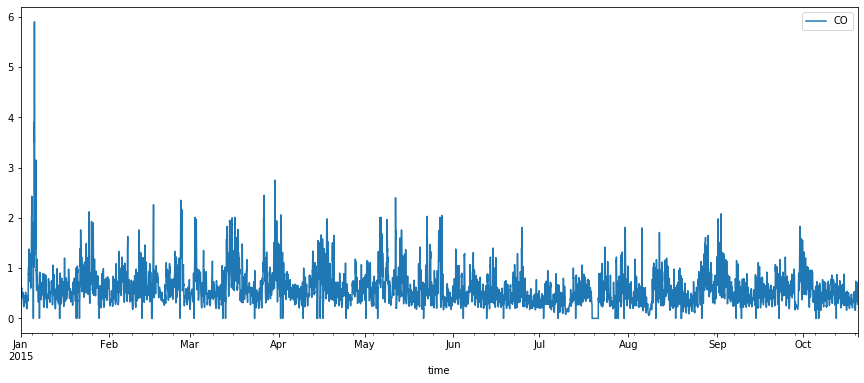

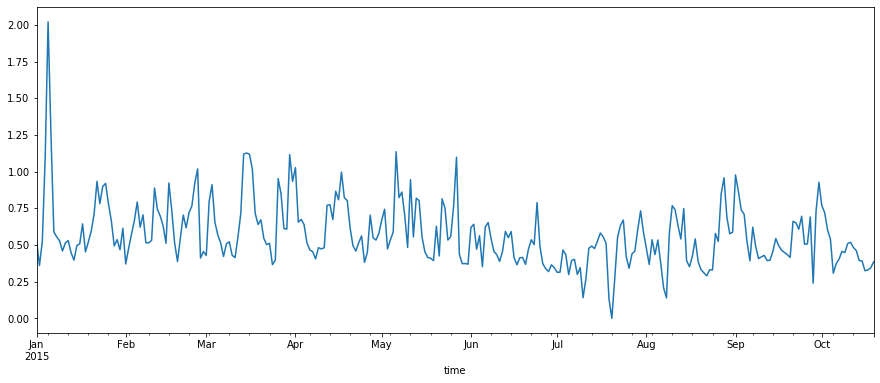

In [78]:
#Dust particles training hourly basis
train.plot(figsize=(15, 6))
plt.show()
#Average Dust particles Daily basis
y.plot(figsize=(15, 6))
plt.show()

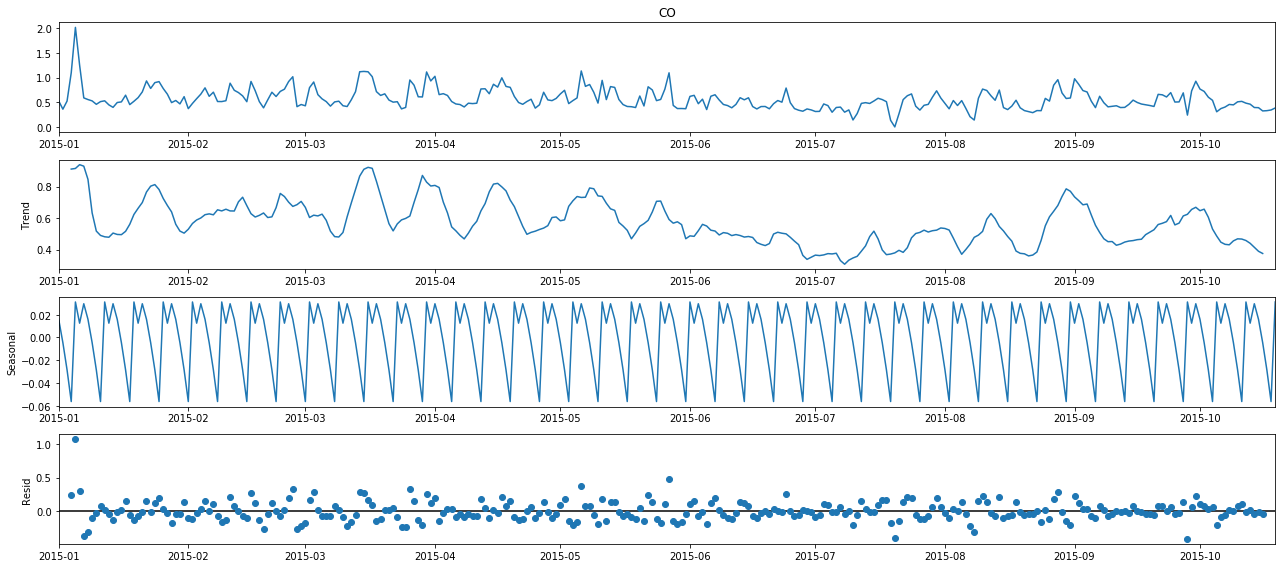

In [79]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [80]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [81]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
# Hypothesis 
# H0: Data are stationary 
# H1: Data are not stationary

kpss_test(train)

KPSS Statistic: 2.5287307835089083
p-value: 0.01
num lags: 35
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [82]:
train['CO']=np.log(train['CO'])
train['CO'] = train['CO'] - train['CO'].shift(1)
train.dropna(inplace=True)


C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
from numpy import inf
y_log = train['CO'].resample('D').mean()
y_log[y_log==-inf]=0
y_log[y_log==inf]=0
print(y_log.mean())
# min(y_log)
# y_log[y_log.isna()==True]=
# print(y_log.isna())

-0.0011662623295325858


In [84]:
y_log.all()

False

In [85]:
y_log=y_log.fillna(method = 'ffill')
y_log.all()

False

In [86]:
kpss_test(y_log)

KPSS Statistic: 0.1232532760052443
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [87]:
type(train)

pandas.core.frame.DataFrame

In [88]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
aic=[]
temp=0
lowest=10000000000000000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_log,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append(results.aic)
            temp=results.aic
            if(temp<lowest):
                lowest=temp
                l_param=param
                l_param_seasonal=param_seasonal
            
        except:
            continue
print(min(aic))
print(lowest)
print(l_param)
print(l_param_seasonal)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-1412.8551123301368
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-1363.1405184813866
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1171.8321621778425
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1264.5924778201274
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1368.9153745364551
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1361.2122445968546
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1200.607244046018
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1266.5095092589331
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-1410.772626229726
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-1365.5410081822156


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1170.9866624294132
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-1264.3183510369781
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1377.013868632796
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1363.5640184473646
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-1192.7249809706723
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-1270.7146716216384
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1172.6591020959029
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1122.9057653149725
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-941.9548571545445
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-1041.0855778103999
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-1127.9590082833386
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-1120.914059487191
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-986.2156861225362
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-1039.45058147
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-1397.8802577422066
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-1345.1656702808366
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-1158.6173457455861
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-12

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-1187.962180933624


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-1271.1517277992948
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-1255.4320618473655
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-1208.8052263975553
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-1012.5422219817084


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-1118.9429475177944
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-1208.7856616635838
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-1206.9524327056045


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-1047.497887424248
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-1117.0209745183902
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-1401.1645746106146
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-1350.7219595209765
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-1160.698184924905


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-1248.3027826175812
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-1355.779338295436
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-1348.732645510223
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-1183.3972232595563
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1251.0552384408334
-1415.2329763676346
-1415.2329763676346
(1, 0, 0)
(0, 0, 0, 12)


In [90]:
mod = sm.tsa.statespace.SARIMAX(y_log,order=l_param,seasonal_order=l_param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
model_fit= mod.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                  292
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 709.616
Date:                Mon, 25 May 2020   AIC                          -1415.233
Time:                        13:37:34   BIC                          -1407.886
Sample:                    01-01-2015   HQIC                         -1412.290
                         - 10-19-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1216      0.046     -2.642      0.008      -0.212      -0.031
sigma2         0.0004   2.68e-05     16.651      0.000       0.000       0.000
Ljung-Box (Q):                       29.45   Jarque-

In [48]:
model_fit.save('TS_model_for_CO.pkl')

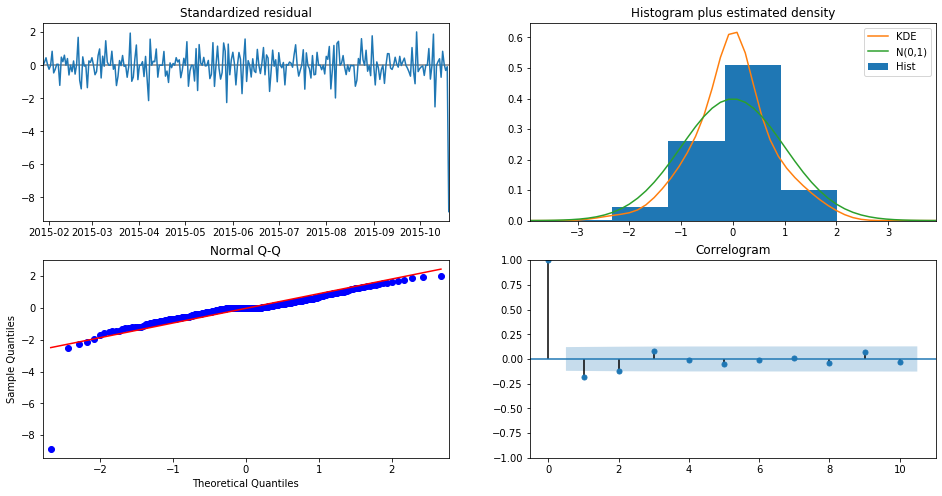

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [50]:
test['CO']=np.log(test['CO'])
test.dropna(inplace=True)
test

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,CO
6999,2015-10-20 01:00:00,-1.771957
7000,2015-10-20 02:00:00,-1.966113
7001,2015-10-20 03:00:00,-2.207275
7002,2015-10-20 04:00:00,-2.040221
7003,2015-10-20 05:00:00,-1.832581
...,...,...
8744,2015-12-31 19:00:00,0.039221
8745,2015-12-31 20:00:00,-0.139262
8746,2015-12-31 21:00:00,-0.235722
8747,2015-12-31 22:00:00,-0.235722


In [51]:

pred = results.get_prediction(start=pd.to_datetime('2015-08-20'), dynamic=False)
pred_ci = pred.conf_int()

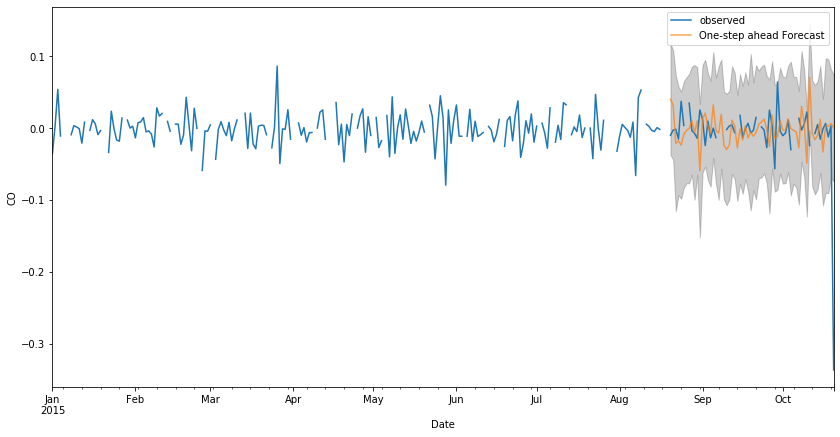

In [52]:
ax = y_log['2015-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO')
plt.legend()


In [53]:
y_forecasted = pred.predicted_mean
y_truth = y_log['2015-01-21':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 0.06


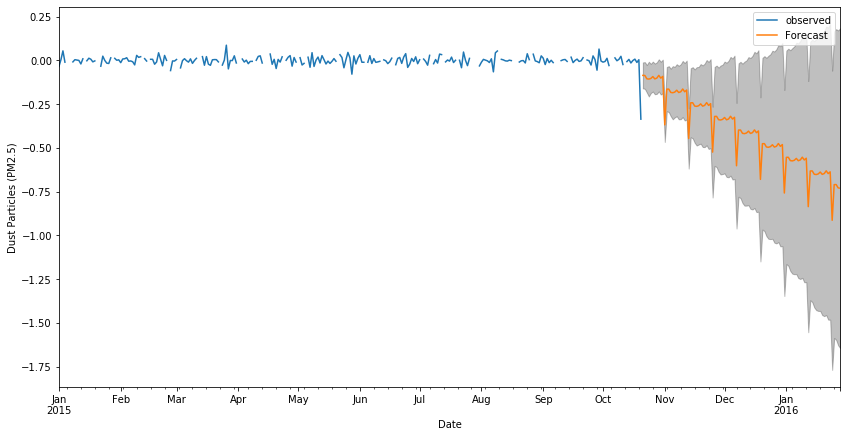

In [54]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y_log.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Dust Particles (PM2.5)')
plt.legend()
plt.show()

In [55]:
model_loaded = AutoRegResults.load('TS_model_for_CO.pkl')
print(model_loaded.params)

ar.L1    -0.270293
sigma2    0.000882
dtype: float64


In [56]:
test

,time,CO
6999,2015-10-20 01:00:00,-1.771957
7000,2015-10-20 02:00:00,-1.966113
7001,2015-10-20 03:00:00,-2.207275
7002,2015-10-20 04:00:00,-2.040221
7003,2015-10-20 05:00:00,-1.832581
...,...,...
8744,2015-12-31 19:00:00,0.039221
8745,2015-12-31 20:00:00,-0.139262
8746,2015-12-31 21:00:00,-0.235722
8747,2015-12-31 22:00:00,-0.235722


In [58]:
10**model_loaded.predict('2015-10-19','2015-10-28')

2015-10-19    1.007738
2015-10-20    0.998080
2015-10-21    1.232952
2015-10-22    0.944970
2015-10-23    1.015417
2015-10-24    0.995873
2015-10-25    1.001118
2015-10-26    0.999698
2015-10-27    1.000082
2015-10-28    0.999978
Freq: D, dtype: float64